#### Preparazione dataset

In [244]:
import pandas as pd
df_v3=pd.read_csv('command/commands_log_3.csv',names=['comando','range','start','end','db_time','overall_time','ram'])
df_v3['range']=df_v3['range'].apply(lambda x: int(x.split('-')[1]))

df_v5=pd.read_csv('command/commands_log_2.csv',names=['comando','range','start','end','db_time','overall_time','ram'])
df_v5['range']=df_v5['range'].apply(lambda x: int(x.split('-')[1]))

df_PGSQL=pd.read_csv('command/commands_log_PGSQL.csv',names=['comando','range','start','end','overall_time','ram'])
df_PGSQL['overall_time']=df_PGSQL['overall_time']/1000000000
df_PGSQL['range']=df_PGSQL['range'].apply(lambda x: int(x.split('-')[1]))

df_samtools=pd.read_csv('command/commands_log_samtools_final.csv',names=['comando','range','start','end','overall_time','ram'])
df_samtools['overall_time']=df_samtools['overall_time']/1000000000
df_samtools['range']=df_samtools['range'].apply(lambda x: int(x.split('-')[1]))

In [208]:
def Q1(x):
    return x.quantile(0.25)

def Q3(x):
    return x.quantile(0.75)

In [245]:
df_v3_grouped=df_v3.sort_values(by=['comando','range']).groupby(['comando','range'], as_index = False).agg({'overall_time':['median',Q1,Q3  ],'ram': ['median' ,Q1,Q3 ]})
df_v3_grouped_final=pd.DataFrame({'comando':list(df_v3_grouped['comando']),
                        'range':list(df_v3_grouped['range']),
                        'time_median':list(df_v3_grouped['overall_time']['median'])
                        ,'time_Q1':list(df_v3_grouped['overall_time']['Q1'])
                        ,'time_Q3':list(df_v3_grouped['overall_time']['Q3'])
                        ,'ram_median':list(df_v3_grouped['ram']['median'])
                        ,'ram_Q1':list(df_v3_grouped['ram']['Q1'])
                        ,'ram_Q3':list(df_v3_grouped['ram']['Q3'])})

df_v5_grouped=df_v5.sort_values(by=['comando','range']).groupby(['comando','range'], as_index = False).agg({'overall_time':['median',Q1,Q3 ],'ram': ['median' ,Q1,Q3  ]})
df_v5_grouped_final=pd.DataFrame({'comando':list(df_v5_grouped['comando']),
                        'range':list(df_v5_grouped['range']),
                        'time_median':list(df_v5_grouped['overall_time']['median'])
                        ,'time_Q1':list(df_v5_grouped['overall_time']['Q1'])
                        ,'time_Q3':list(df_v5_grouped['overall_time']['Q3'])
                        ,'ram_median':list(df_v5_grouped['ram']['median'])
                        ,'ram_Q1':list(df_v5_grouped['ram']['Q1'])
                        ,'ram_Q3':list(df_v5_grouped['ram']['Q3'])})

df_PGSQL_grouped=df_PGSQL.sort_values(by=['comando','range']).groupby(['comando','range'], as_index = False).agg({'overall_time':['median',Q1,Q3 ],'ram': ['median' ,Q1,Q3  ]})
df_PGSQL_grouped_final=pd.DataFrame({'comando':list(df_PGSQL_grouped['comando']),
                        'range':list(df_PGSQL_grouped['range']),
                        'time_median':list(df_PGSQL_grouped['overall_time']['median'])
                        ,'time_Q1':list(df_PGSQL_grouped['overall_time']['Q1'])
                        ,'time_Q3':list(df_PGSQL_grouped['overall_time']['Q3'])
                        ,'ram_median':list(df_PGSQL_grouped['ram']['median'])
                        ,'ram_Q1':list(df_PGSQL_grouped['ram']['Q1'])
                        ,'ram_Q3':list(df_PGSQL_grouped['ram']['Q3'])})

df_samtools_grouped=df_samtools.sort_values(by=['comando','range']).groupby(['comando','range'], as_index = False).agg({'overall_time':['median',Q1,Q3 ],'ram': ['median' ,Q1,Q3  ]})
df_samtools_grouped_final=pd.DataFrame({'comando':list(df_samtools_grouped['comando']),
                        'range':list(df_samtools_grouped['range'])
                        ,'time_median':list(df_samtools_grouped['overall_time']['median'])
                        ,'time_Q1':list(df_samtools_grouped['overall_time']['Q1'])
                        ,'time_Q3':list(df_samtools_grouped['overall_time']['Q3'])
                        ,'ram_median':list(df_samtools_grouped['ram']['median'])
                        ,'ram_Q1':list(df_samtools_grouped['ram']['Q1'])
                        ,'ram_Q3':list(df_samtools_grouped['ram']['Q3'])})


In [210]:
df_PGSQL_grouped_final

,comando,range,time_median,time_Q1,time_Q3,ram_median,ram_Q1,ram_Q3
0,consensus,20000,6.392418,6.267895,6.665615,12784.0,12768.0,13060.0
1,consensus,40000,12.700845,12.663171,13.213363,12820.0,12812.0,13044.0
2,consensus,60000,22.245668,21.363080,28.398598,12868.0,12800.0,12972.0
3,consensus,80000,35.876927,32.191546,42.476853,12828.0,12736.0,12956.0
4,consensus,100000,60.220242,49.725284,63.330660,12904.0,12716.0,12964.0
...,...,...,...,...,...,...,...,...
85,mpileup,520000,2539.864318,2519.638152,2592.895210,12284.0,11668.0,12380.0
86,mpileup,540000,2783.874050,2757.632592,2787.288481,12336.0,11648.0,12368.0
87,mpileup,560000,3031.968179,3015.020079,3079.262438,12456.0,11760.0,12500.0
88,mpileup,580000,3416.106412,3322.201020,3659.210256,12256.0,11716.0,12476.0


#### Grafico confronto versioni

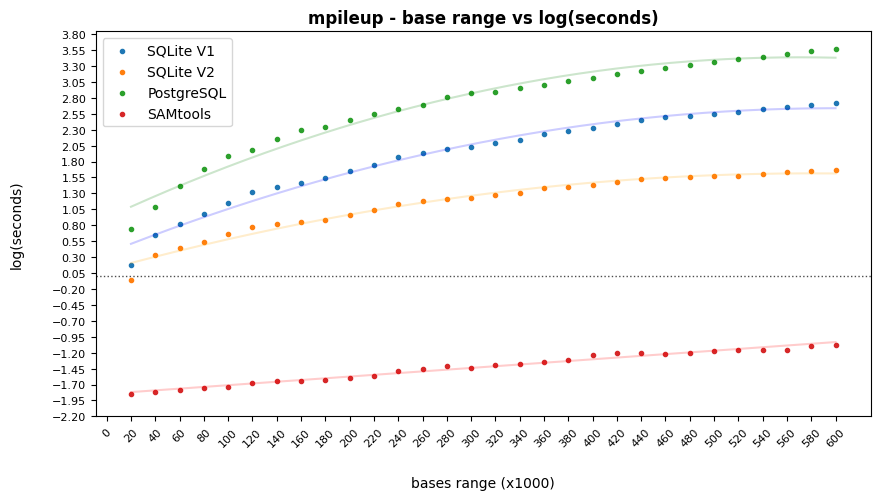

In [246]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10,5]

fig, ax = plt.subplots()

plt.axhline(y=0,   ls=':', lw=1, alpha=0.7,color='black')

x1=list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['range'])
y1=list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['overall_time']['median'])
y1_log=np.log10(y1)

x2=list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['range'])
y2=list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['median'])
y2_log=np.log10(y2)

x3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['range'])
y3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['overall_time']['median'])
y3_log=np.log10(y3)

x4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['range'])
y4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['median'])
y4_log=np.log10(y4)
    
ax.scatter( x1 ,y1_log, marker=".",label='SQLite V1')
ax.scatter( x2 ,y2_log, marker=".",label='SQLite V2')
ax.scatter( x3 ,y3_log, marker=".",label='PostgreSQL')
ax.scatter( x4 ,y4_log, marker=".", label='SAMtools')

z = np.polyfit(x1, y1_log, 2)
w=np.polyfit(x2, y2_log, 2)
k=np.polyfit(x3, y3_log, 2)
p=np.polyfit(x4, y4_log, 1)

fit_equation_z = np.poly1d(z)
fit_equation_w = np.poly1d(w)
fit_equation_k = np.poly1d(k)
fit_equation_p = np.poly1d(p)

X1_fit = np.linspace(min(x1), max(x1), 1000)
Y1_fit = fit_equation_z(X1_fit)

X2_fit = np.linspace(min(x2), max(x2), 1000)
Y2_fit = fit_equation_w(X2_fit)

X3_fit = np.linspace(min(x3), max(x3), 1000)
Y3_fit = fit_equation_k(X3_fit)

X4_fit = np.linspace(min(x4), max(x4), 1000)
Y4_fit = fit_equation_p(X4_fit)

ax.plot(X1_fit, Y1_fit, color='b', alpha=0.2)
ax.plot(X2_fit, Y2_fit, color='orange', alpha=0.2)
ax.plot(X3_fit, Y3_fit, color='g', alpha=0.2)
ax.plot(X4_fit, Y4_fit, color='r', alpha=0.2)
    
base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, (max(x1)+20000)/1000, 20)]
    
ax.xaxis.set_ticks(np.arange(0, max(x1)+20000, 20000),labels=xlabels)
ax.yaxis.set_ticks(np.arange(-2.2, max(y3_log)+0.25,0.25)) #, 15
    
ax.set_xticklabels(xlabels, rotation=45)
    
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
    
ax.set_xlabel('bases range (x1000)',labelpad=20)
ax.set_ylabel('log(seconds)',labelpad=20)

ax.set_title('mpileup - base range vs log(seconds)', weight='bold')

ax.legend(loc="upper left")
    
plt.show()

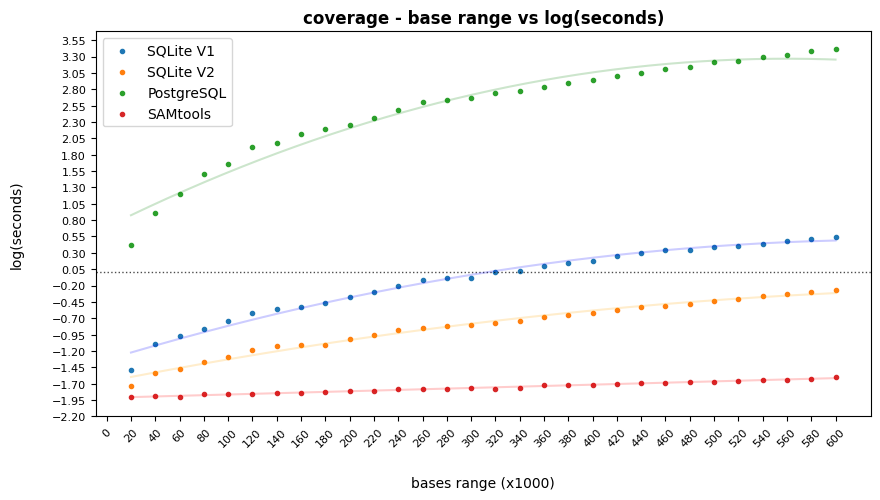

In [284]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10,5]

fig, ax = plt.subplots()

plt.axhline(y=0,   ls=':', lw=1, alpha=0.7,color='black')

x1=list(df_v3_grouped[df_v3_grouped.comando=='coverage_v3.py']['range'])
y1=list(df_v3_grouped[df_v3_grouped.comando=='coverage_v3.py']['overall_time']['median'])
y1_log=np.log10(y1)

x2=list(df_v5_grouped[df_v5_grouped.comando=='coverage_v5.py']['range'])
y2=list(df_v5_grouped[df_v5_grouped.comando=='coverage_v5.py']['overall_time']['median'])
y2_log=np.log10(y2)

x3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='coverage']['range'])
y3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='coverage']['overall_time']['median'])
y3_log=np.log10(y3)

x4=list(df_samtools_grouped[df_samtools_grouped.comando=='coverage']['range'])
y4=list(df_samtools_grouped[df_samtools_grouped.comando=='coverage']['overall_time']['median'])
y4_log=np.log10(y4)
    
ax.scatter( x1 ,y1_log, marker=".",label='SQLite V1')
ax.scatter( x2 ,y2_log, marker=".",label='SQLite V2')
ax.scatter( x3 ,y3_log, marker=".",label='PostgreSQL')
ax.scatter( x4 ,y4_log, marker=".", label='SAMtools')

z = np.polyfit(x1, y1_log, 2)
w=np.polyfit(x2, y2_log, 2)
k=np.polyfit(x3, y3_log, 2)
p=np.polyfit(x4, y4_log, 1)

fit_equation_z = np.poly1d(z)
fit_equation_w = np.poly1d(w)
fit_equation_k = np.poly1d(k)
fit_equation_p = np.poly1d(p)

X1_fit = np.linspace(min(x1), max(x1), 1000)
Y1_fit = fit_equation_z(X1_fit)

X2_fit = np.linspace(min(x2), max(x2), 1000)
Y2_fit = fit_equation_w(X2_fit)

X3_fit = np.linspace(min(x3), max(x3), 1000)
Y3_fit = fit_equation_k(X3_fit)

X4_fit = np.linspace(min(x4), max(x4), 1000)
Y4_fit = fit_equation_p(X4_fit)

ax.plot(X1_fit, Y1_fit, color='b', alpha=0.2)
ax.plot(X2_fit, Y2_fit, color='orange', alpha=0.2)
ax.plot(X3_fit, Y3_fit, color='g', alpha=0.2)
ax.plot(X4_fit, Y4_fit, color='r', alpha=0.2)
    

base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, (max(x1)+20000)/1000, 20)]
    
ax.xaxis.set_ticks(np.arange(0, max(x1)+20000, 20000),labels=xlabels)
ax.yaxis.set_ticks(np.arange(-2.2, max(y3_log)+0.25,0.25)) #, 15
    
ax.set_xticklabels(xlabels, rotation=45)
    
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
    
ax.set_xlabel('bases range (x1000)',labelpad=20)
ax.set_ylabel('log(seconds)',labelpad=20)

ax.set_title('coverage - base range vs log(seconds)', weight='bold')

ax.legend(loc="upper left")
    
plt.show()

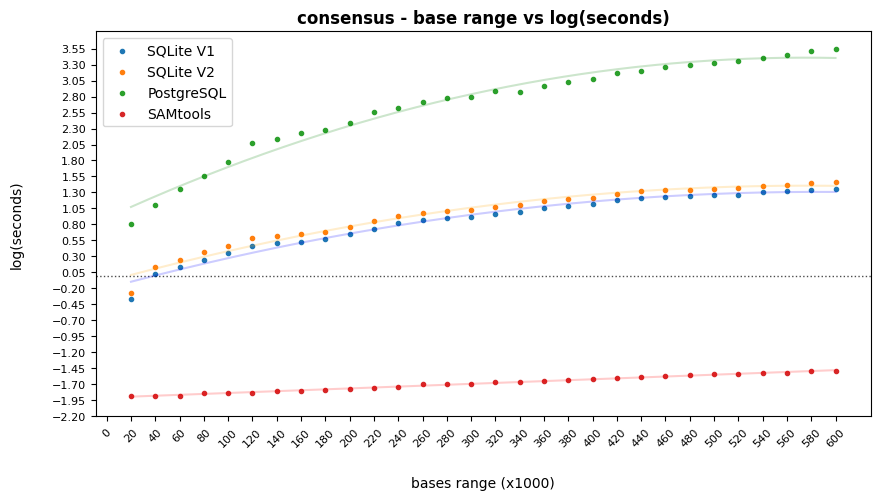

In [248]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10,5]

fig, ax = plt.subplots()

plt.axhline(y=0,   ls=':', lw=1, alpha=0.7,color='black')

x1=list(df_v3_grouped[df_v3_grouped.comando=='consensus_v3.py']['range'])
y1=list(df_v3_grouped[df_v3_grouped.comando=='consensus_v3.py']['overall_time']['median'])
y1_log=np.log10(y1)

x2=list(df_v5_grouped[df_v5_grouped.comando=='consensus_v5.py']['range'])
y2=list(df_v5_grouped[df_v5_grouped.comando=='consensus_v5.py']['overall_time']['median'])
y2_log=np.log10(y2)

x3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='consensus']['range'])
y3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='consensus']['overall_time']['median'])
y3_log=np.log10(y3)

x4=list(df_samtools_grouped[df_samtools_grouped.comando=='consensus']['range'])
y4=list(df_samtools_grouped[df_samtools_grouped.comando=='consensus']['overall_time']['median'])
y4_log=np.log10(y4)
    
ax.scatter( x1 ,y1_log, marker=".",label='SQLite V1')
ax.scatter( x2 ,y2_log, marker=".",label='SQLite V2')
ax.scatter( x3 ,y3_log, marker=".",label='PostgreSQL')
ax.scatter( x4 ,y4_log, marker=".", label='SAMtools')

z = np.polyfit(x1, y1_log, 2)
w=np.polyfit(x2, y2_log, 2)
k=np.polyfit(x3, y3_log, 2)
p=np.polyfit(x4, y4_log, 1)

fit_equation_z = np.poly1d(z)
fit_equation_w = np.poly1d(w)
fit_equation_k = np.poly1d(k)
fit_equation_p = np.poly1d(p)

X1_fit = np.linspace(min(x1), max(x1), 1000)
Y1_fit = fit_equation_z(X1_fit)

X2_fit = np.linspace(min(x2), max(x2), 1000)
Y2_fit = fit_equation_w(X2_fit)

X3_fit = np.linspace(min(x3), max(x3), 1000)
Y3_fit = fit_equation_k(X3_fit)

X4_fit = np.linspace(min(x4), max(x4), 1000)
Y4_fit = fit_equation_p(X4_fit)

ax.plot(X1_fit, Y1_fit, color='b', alpha=0.2)
ax.plot(X2_fit, Y2_fit, color='orange', alpha=0.2)
ax.plot(X3_fit, Y3_fit, color='g', alpha=0.2)
ax.plot(X4_fit, Y4_fit, color='r', alpha=0.2)
    
base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, (max(x1)+20000)/1000, 20)]
    
ax.xaxis.set_ticks(np.arange(0, max(x1)+20000, 20000),labels=xlabels)
ax.yaxis.set_ticks(np.arange(-2.2, max(y3_log)+0.25,0.25)) #, 15
    
ax.set_xticklabels(xlabels, rotation=45)
    
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
    
ax.set_xlabel('bases range (x1000)',labelpad=20)
ax.set_ylabel('log(seconds)',labelpad=20)

ax.set_title('consensus - base range vs log(seconds)', weight='bold')

ax.legend(loc="upper left")
    
plt.show()

#### Confronto comandi su range

In [19]:

def polyfit_f(a,b,grade=2):
    z = np.polyfit(a, b, grade)
    fit_equation_z = np.poly1d(z)
    X1_fit = np.linspace(min(a), max(a), 1000)
    Y1_fit = fit_equation_z(X1_fit)

    return X1_fit,Y1_fit

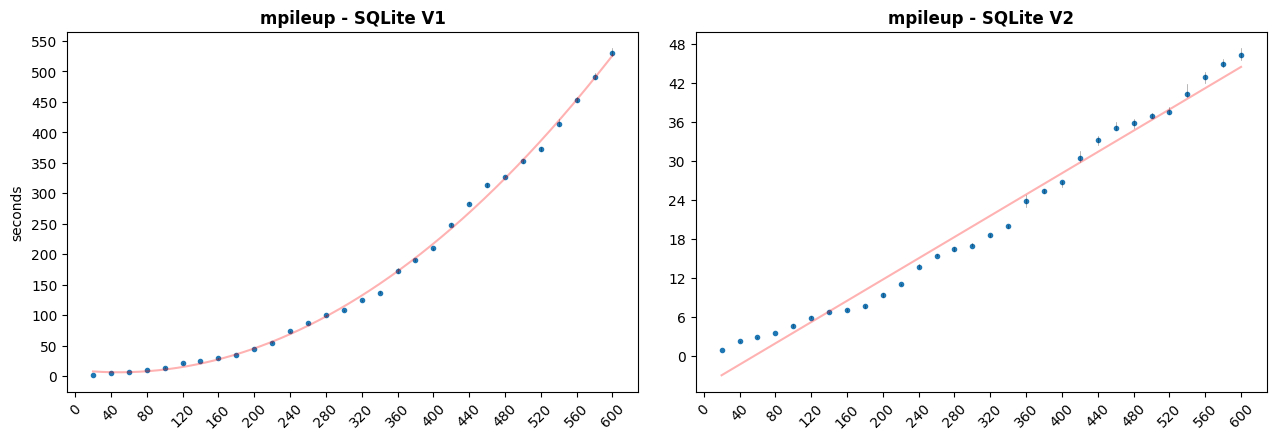

In [291]:
	
#predisporre 4 grafici in cui si può osservare la questione della linearità
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,12]

figure, axis = plt.subplots(1, 2)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.4,wspace=0.1, hspace=0.5)
  
x1=list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['range'])
y1=list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['overall_time']['median'])
y1_log=np.log10(y1)

x2=list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['range'])
y2=list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['median'])
y2_log=np.log10(y2)


axis[0].scatter( x1 ,y1, marker=".")
zip_lists=zip(list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['range']),list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['overall_time']['median']),list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['overall_time']['Q1']),list(df_v3_grouped[df_v3_grouped.comando=='mpileup_v3.py']['overall_time']['Q3']))
for i,j,z,q in zip_lists:
    axis[0].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)

axis[1].scatter( x2 ,y2, marker=".")
zip_lists2=zip(list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['range']),list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['median']),list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['Q1']),list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['Q3']))
for i,j,z,q in zip_lists2:
    axis[1].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)




axis[0].xaxis.set_ticks(np.arange(0, max(x1)+20000, 40000))
axis[0].yaxis.set_ticks(np.arange(0, max(y1)+50,50)) #, 15
axis[1].xaxis.set_ticks(np.arange(0, max(x2)+20000, 40000))
axis[1].yaxis.set_ticks(np.arange(0, max(y2)+5,6)) #, 15

base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, (max(x1)+20000)/1000, 40)]    
axis[0].set_xticklabels(xlabels, rotation=45)
axis[1].set_xticklabels(xlabels, rotation=45)


x1_fit,y1_fit=polyfit_f(x1 ,y1,grade=2)
x2_fit,y2_fit=polyfit_f(x2 ,y2,grade=1)

axis[0].plot(x1_fit,y1_fit, color='r', alpha=0.3)
axis[1].plot(x2_fit,y2_fit, color='r', alpha=0.3)


axis[0].set_ylabel('seconds',labelpad=5)
axis[0].set_title('mpileup - SQLite V1', weight='bold')
axis[1].set_title('mpileup - SQLite V2', weight='bold')

plt.show()	


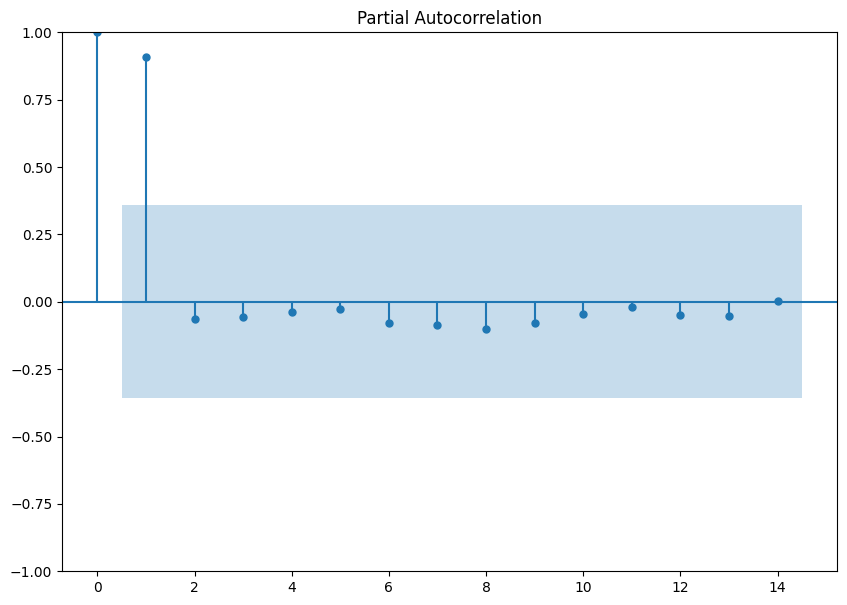

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(list(df_v5_grouped[df_v5_grouped.comando=='mpileup_v5.py']['overall_time']['median']), lags=14, method="ywm")
plt.show()

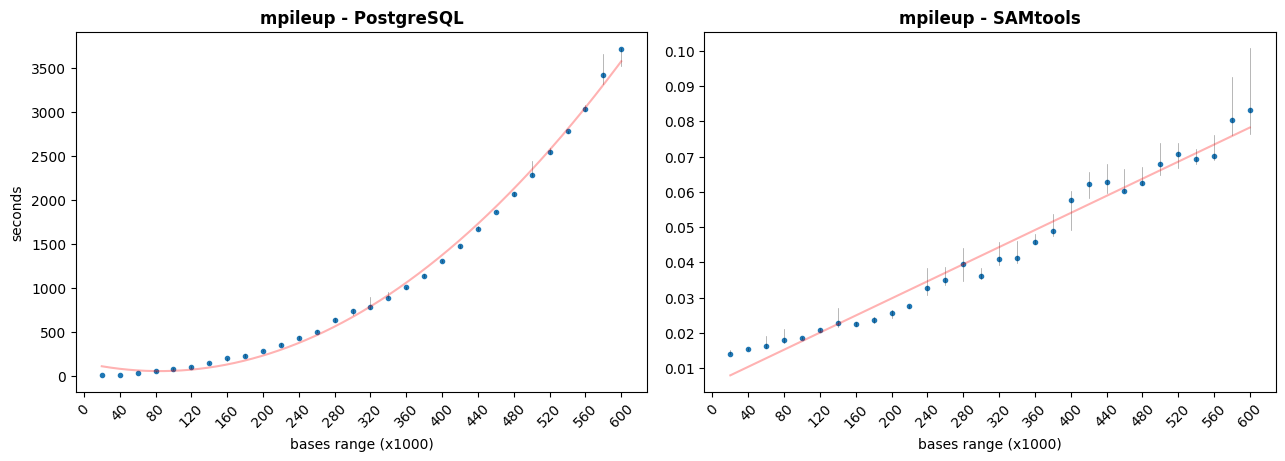

In [297]:
	
#predisporre 4 grafici in cui si può osservare la questione della linearità
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,12]

figure, axis = plt.subplots(1, 2)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.4,wspace=0.1, hspace=0.5)


x3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['range'])
y3=list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['overall_time']['median'])
y3_log=np.log10(y3)

x4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['range'])
y4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['median'])
y4_log=np.log10(y4)


axis[0].scatter( x3 ,y3, marker=".")
zip_lists=zip(list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['range']),list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['overall_time']['median']),list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['overall_time']['Q1']),list(df_PGSQL_grouped[df_PGSQL_grouped.comando=='mpileup']['overall_time']['Q3']))
for i,j,z,q in zip_lists:
    axis[0].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)

axis[1].scatter( x4 ,y4, marker=".")
zip_lists2=zip(list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['range']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['median']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['Q1']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['Q3']))
for i,j,z,q in zip_lists2:
    axis[1].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)


axis[0].xaxis.set_ticks(np.arange(0, max(x3)+20000, 40000))
axis[0].yaxis.set_ticks(np.arange(0, max(y3)+500,500)) #, 15
axis[1].xaxis.set_ticks(np.arange(0, max(x4)+20000, 40000))
axis[1].yaxis.set_ticks(np.arange(0, max(y4)+0.02,0.01)) #, 15


base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, (max(x3)+20000)/1000, 40)]    
axis[0].set_xticklabels(xlabels, rotation=45)
axis[1].set_xticklabels(xlabels, rotation=45)


x3_fit,y3_fit=polyfit_f(x3 ,y3,grade=2)
x4_fit,y4_fit=polyfit_f(x4 ,y4,grade=1)

axis[0].plot(x3_fit,y3_fit, color='r', alpha=0.3)
axis[1].plot(x4_fit,y4_fit, color='r', alpha=0.3)

axis[0].set_xlabel('bases range (x1000)',labelpad=5)
axis[0].set_ylabel('seconds',labelpad=5)
axis[1].set_xlabel('bases range (x1000)',labelpad=5)

axis[0].set_title('mpileup - PostgreSQL', weight='bold')
axis[1].set_title('mpileup - SAMtools', weight='bold')


# Combine all the operations and display
plt.show()	


#### Osservazione su performance estrazione dataset SQLite

In [195]:
df_v5_grouped_dbtime=df_v5.sort_values(by=['comando','range']).groupby(['comando','range'], as_index = False).agg({'db_time':['median',Q1,Q3 ]})

In [196]:
df_v5_grouped_dbtime

comando   range   db_time                    
                               median        Q1        Q3
0   consensus_v5.py   20000  0.002765  0.002670  0.002826
1   consensus_v5.py   40000  0.003943  0.003826  0.004222
2   consensus_v5.py   60000  0.004318  0.004207  0.004514
3   consensus_v5.py   80000  0.004978  0.004711  0.005326
4   consensus_v5.py  100000  0.005781  0.005571  0.006150
..              ...     ...       ...       ...       ...
85    mpileup_v5.py  520000  0.030791  0.029182  0.031219
86    mpileup_v5.py  540000  0.032807  0.031626  0.033238
87    mpileup_v5.py  560000  0.033170  0.032426  0.035168
88    mpileup_v5.py  580000  0.035477  0.034697  0.036592
89    mpileup_v5.py  600000  0.037530  0.035625  0.038105

[90 rows x 5 columns]

/tmp/ipykernel_15980/2804515334.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels, rotation=45)
/tmp/ipykernel_15980/2804515334.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels, rotation=45)


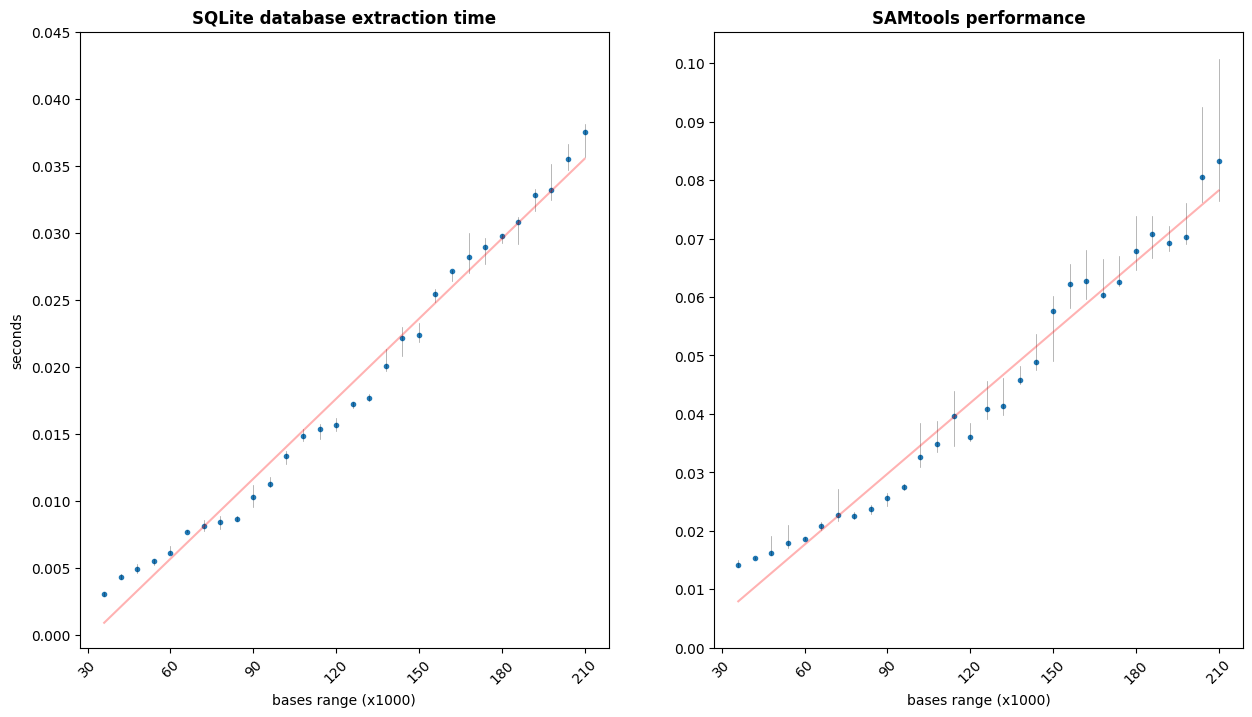

In [330]:

#predisporre 4 grafici in cui si può osservare la questione della linearità
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,8]

figure, ax = plt.subplots(1,2)
  

x1=list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['range'])
y1=list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['db_time']['median'])
y1_log=np.log10(y2)


x4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['range'])
y4=list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['median'])
y4_log=np.log10(y4)


ax[0].scatter( x1 ,y1, marker=".")

zip_lists=zip(list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['range']),list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['db_time']['median']),list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['db_time']['Q1']),list(df_v5_grouped_dbtime[df_v5_grouped_dbtime.comando=='mpileup_v5.py']['db_time']['Q3']))
for i,j,z,q in zip_lists:
    ax[0].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)


ax[1].scatter( x4 ,y4, marker=".")
zip_lists=zip(list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['range']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['median']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['Q1']),list(df_samtools_grouped[df_samtools_grouped.comando=='mpileup']['overall_time']['Q3']))
for i,j,z,q in zip_lists:
    ax[1].plot([i,i],[q,z],color='black',lw=0.5,alpha=0.4)


x1_fit,y1_fit=polyfit_f(x1 ,y1,grade=1)
x2_fit,y2_fit=polyfit_f(x4 ,y4,grade=1)

ax[0].plot(x1_fit,y1_fit, color='r', alpha=0.3)
ax[1].plot(x2_fit,y2_fit, color='r', alpha=0.3)

ax[0].yaxis.set_ticks(np.arange(0, max(y1)+0.01,0.005)) 
ax[1].yaxis.set_ticks(np.arange(0, max(y4)+0.02,0.01)) 

ax[0].set_xlabel('bases range (x1000)',labelpad=5)
ax[0].set_ylabel('seconds',labelpad=5)
ax[1].set_xlabel('bases range (x1000)',labelpad=5)

ax[0].set_title('SQLite database extraction time', weight='bold')
ax[1].set_title('SAMtools performance', weight='bold')

base = "{}"
xlabels=[base.format(int(year)) for year in np.arange(0, max(x1)/1000, 30)]    
ax[0].set_xticklabels(xlabels, rotation=45)
ax[1].set_xticklabels(xlabels, rotation=45)


plt.show()
